# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 10



**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 20 баллов
* Задача 4 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 5 &mdash; 30 баллов
* Задача 6 &mdash; 35 баллов

-----

In [ ]:
# Bot check

# HW_ID: phds_hw10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from tqdm import tqdm

### <b><font color="blue">Легкая часть</font></b>
### Задача 1

Проверьте, отличается ли средний балл студентов курса Phystech@DataScience за легкую часть задания 3 и 6 весной 2024.

Данные возьмите из [таблицы оценок](https://docs.google.com/spreadsheets/d/1CTOvQrxRpGEJG5vOIVYSPBfUzON5MAsnZeAUj3xxzFA/edit?usp=sharing). Не забудьте визуализировать данные с помощью ядерной оценки плотности (вам поможет функция `sns.kdeplot`) и оценить сдвиг.



In [97]:
def to_int(arr):
    for i, mark in enumerate(arr):
        if isinstance(mark, str):
            for symb in mark:
                if not symb.isdigit():
                    arr[i] = mark.split(symb)[0]
    return np.array(list(map(int, arr)))

In [117]:
data = pd.read_excel('./Успеваемость Ph@DS 2024.xlsx',sheet_name='Домашние задания')
df = data[['ДЗ 3', 'ДЗ 6']]
df = df.drop([0, 1])
df.iloc[165]['ДЗ 6'] = 32.5

In [99]:
task3 = df['ДЗ 3'].values
task6 = to_int(df['ДЗ 6'].values)

In [100]:
task3_not_0 = task3[task3 != 0]
task6_not_0 = task6[task6 != 0]

<Axes: ylabel='Density'>

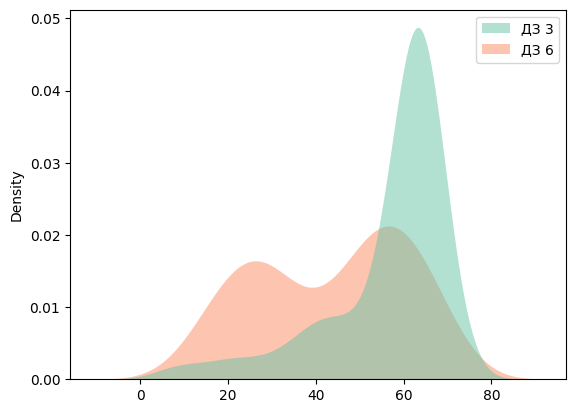

In [131]:
sns.kdeplot(data=df[df != 0], fill=True, common_norm=False, palette="Set2", alpha=0.5, linewidth=0)

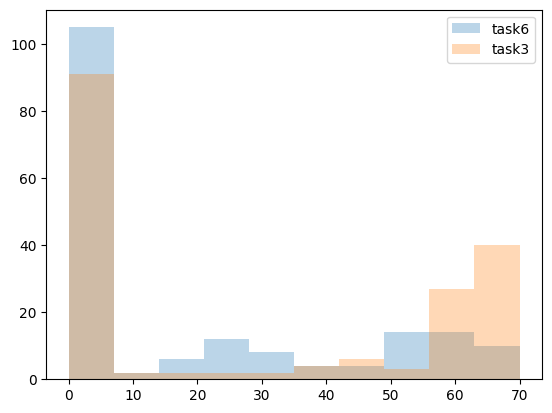

In [106]:
plt.hist(task6, alpha=0.3, label='task6')
plt.hist(task3, alpha=0.3, label='task3')
plt.legend()
plt.show()

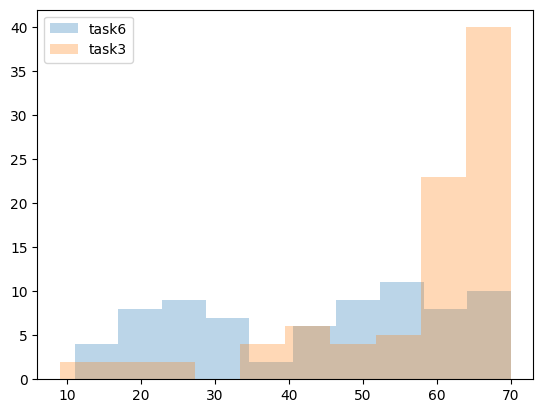

In [105]:
plt.hist(task6_not_0, alpha=0.3, label='task6')
plt.hist(task3_not_0, alpha=0.3, label='task3')
plt.legend()
plt.show()

In [132]:
sps.ttest_rel(task3, task6)

TtestResult(statistic=6.645330978122422, pvalue=3.562401119703605e-10, df=178)

In [134]:
sps.ttest_rel(task3, task6, alternative='less')

TtestResult(statistic=6.645330978122422, pvalue=0.9999999998218799, df=178)

In [135]:
sps.ttest_rel(task3, task6, alternative='greater')

TtestResult(statistic=6.645330978122422, pvalue=1.7812005598518024e-10, df=178)

In [138]:
print(task3.mean(), task6.mean())

27.804469273743017 17.93854748603352


Сделайте общий вывод по задаче.

**Вывод:**

### Задача 2
Рассмотрите таблицу с оценками по какому-либо курсу с несколькими семинарскими группами. Выберите свою группу и еще какую-нибудь. Проверьте гипотезу о том, что средний балл не отличается между семинарскими группами. Не забывайте про визуализацию.

Сделайте выводы.

**Вывод:**

### Задача 3


Предположим, что вы разработали лекарство от коронавируса. Перед применением оно обязательно должно пройти клинические испытания. Для начала было разрешено проверить лекарство на двух независимых группах по 10 человек. Одна группа принимает плацебо, другая &mdash; ваш препарат. Большее количество пациентов на первом этапе брать не разрешают &mdash; слишком велики риски отрицательного результата.

Для каждого пациента измерялось количество дней от приема препарата до выздоровления. Получились следуюшие результаты:

In [139]:
x = [6, 16, 8, 13, 9, 4, 7, 10, 3, 14]  # плацебо
y = [5, 10, 3, 1, 5, 3, 19, 2, 2, 5]  # лекарство

Что вы можете сказать на основе этих результатов?
* Лекарство эффективнее, подтверждается статистическими методами;
* Наверное, лекарство эффективнее, но статистическими методами это пока не подтверждено, нужно продолжить эксперимент. Подумайте, как обосновать необходимость продолжение эксперимента;
* По результатам эксперимента нельзя сделать какой-либо вывод. Стоит ли продолжать эксперименты? Если да, то четко это обоснуйте;
* Лекарство неэффективно, нужно немедленно прекращать эксперимент.

In [140]:
df = pd.DataFrame({'placebo': x, 'medicine': y})

<Axes: ylabel='Density'>

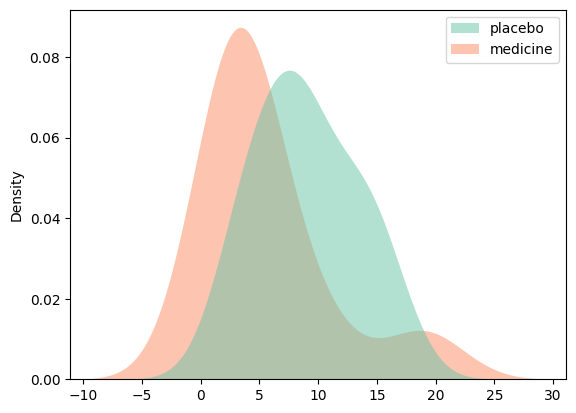

In [141]:
sns.kdeplot(data=df, fill=True, common_norm=False, palette="Set2", alpha=0.5, linewidth=0)

In [148]:
print(sps.ttest_rel(df['placebo'], df['medicine']).pvalue)
print(sps.ttest_rel(df['placebo'], df['medicine'], alternative='less').pvalue)
print(sps.ttest_rel(df['placebo'], df['medicine'], alternative='greater').pvalue)

0.12720674554368294
0.9363966272281585
0.06360337277184147


In [150]:
x = [6, 16, 8, 13, 9, 4, 10, 3, 14]  # плацебо
y = [5, 10, 3, 1, 5, 3, 2, 2, 5]  # лекарство

df = pd.DataFrame({'placebo': x, 'medicine': y})

<Axes: ylabel='Density'>

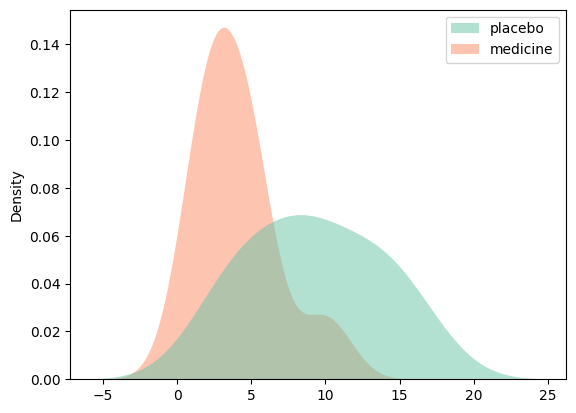

In [151]:
sns.kdeplot(data=df, fill=True, common_norm=False, palette="Set2", alpha=0.5, linewidth=0)

In [152]:
print(sps.ttest_rel(df['placebo'], df['medicine']).pvalue)
print(sps.ttest_rel(df['placebo'], df['medicine'], alternative='less').pvalue)
print(sps.ttest_rel(df['placebo'], df['medicine'], alternative='greater').pvalue)

0.004025019645995128
0.9979874901770025
0.002012509822997564


### Задача 4

Пусть $X=(X_1, \dots, X_n)$, $Y=(Y_1, \dots, Y_m)$ - независимые выборки из нормального распределения.

* $X_1, ..., X_n \sim \mathcal{N}(a_1, \sigma_1^2)$,

* $Y_1, ..., Y_m \sim \mathcal{N}(a_2, \sigma_2^2)$.

C помощью t-test проверяется пара гипотез

$$\mathsf{H}_0\colon EX_1 = 0 \text{ vs } \mathsf{H}_1\colon EX_1 < 0$$

$$\mathsf{H}_0\colon EY_1 = 0 \text{ vs } \mathsf{H}_1\colon EY_1 > 0$$

Оцените реальный уровень значимости процедуры, если обе гипотезы проверяются на уровне $\alpha=0.05$. Совпадает ли он с $\alpha$? Предложите способ сделать так, чтобы он был равен $\alpha$.

### <b><font color="orange">Сложная часть</font></b>

### Задача 5


#### Профиль физика

Скачайте [данные](https://www.kaggle.com/datasets/naharrison/particle-identification-from-detector-responses?resource=download) моделирования неупругого рассеяния протонов и электронов. В датасете представлены 4 разных вида частиц (частицы одного вида имеют одинаковый id).

In [ ]:
path = <...>
data = pd.read_csv(path)
data['id'].unique()

Постройте гистограммы признаков для каждого вида частиц.

In [ ]:
<...>


Для каждой частицы посчитайте среднее значение для каждой колонки с помощью `data.groupby`

In [ ]:
<...>

Для частиц и признаков с похожими средними значениями с помощью критерия Стьюдента проверьте гипотезу о равенстве средних. Не забудьте о МПГ.

Также посчитайте реализацию доверительного интервала величины сдвига. Как связаны доверительные интервалы с проверкой гипотез? Вам могут помочь прошлые лекции. Подтверждается ли это в данном примере?


In [ ]:
<...>

**Ответ:** <...>

Сделайте вывод, по каким измерениям частицы тяжелее/проще всего различить.

**Вывод:** <...>



### Задача 6

Это задание является продолжением задачи 5 из прошлого домашнего задания. Здесь вам необходимо наглядно сравнить два критерия из предыдущей задачи. Для этого прооделайте все пункты для обоих критериев. Обязательно подписывайте какой график к какому критерию относится.


**1.** **Оцените реальный уровень значимости** критерия для размеров выборки $1 \leqslant n \leqslant 50$ и визуализируйте полученную зависимость.

In [ ]:
...

**Вывод:**...

**2.** Для значений $n \in \{5, 15, 30, 50, 100\}$ **оцените функцию мощности критерия** для значений $\theta \in (0, 5)$ по сетке с шагом 0.25 по методу Монте-Карло. Визуализируйте полученные зависимости. Посчитайте также мощность критерия по асимптотической формуле, полученной на лекции, и сравните с оценкой мощности методом Монте-Карло. Учтите, что асимптотическая формула содержит $n$, поэтому для нее тоже должно быть три зависимости.

In [ ]:
...

**Вывод:**...

**3.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta \in (0, 5)$ по сетке с шагом 0.25.

In [ ]:
...

**Вывод:**...

Сделайте общий вывод по сравнению двух критериев.

**Вывод:**